In [68]:
import numpy as np
import scipy as sc
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

[autoreload of six failed: Traceback (most recent call last):
  File "/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: 'NoneType' object has no attribute 'cStringIO'
]
[autoreload of six failed: Traceback (most recent call last):
  File "/home/dslochower/data/applications/anaconda3/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
AttributeError: 'NoneType' object has no attribute 'cStringIO'
]


In [69]:
from motors.simulation import Simulation
from motors.aesthetics import prepare_plot
from motors.aesthetics import paper_plot

In [70]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)
prepare_plot()

In [71]:
apo   = [0]*40 + [2]*8 + [-2]*8 + [0]*20
bound = [0]*20 + [2]*8 + [-2]*8 + [0]*40

# apo   = [0]*40 + [2]*8 + [-2]*8 + [0]*20
# bound = [0]*20 + [-2]*8 + [2]*8 + [0]*40

apo = 3*apo
bound = [i-5 for i in 3*bound]

In [72]:
this = Simulation(data_source='manual')
this.cSubstrate = 10**-3

this.unbound = apo
this.bound = bound

this.C_intersurface = +1.00e+06
this.offset_factor = 5.7
this.catalytic_rate = +3.12e+02
this.simulate(user_energies=True)

/home/dslochower/data/projects/nonequilibrium-master/motors/simulation.py:244: ComplexWarning: Casting complex values to real discards the imaginary part
  ss = abs(eigenvectors[:, self.eigenvalues.argmax()].astype(float))


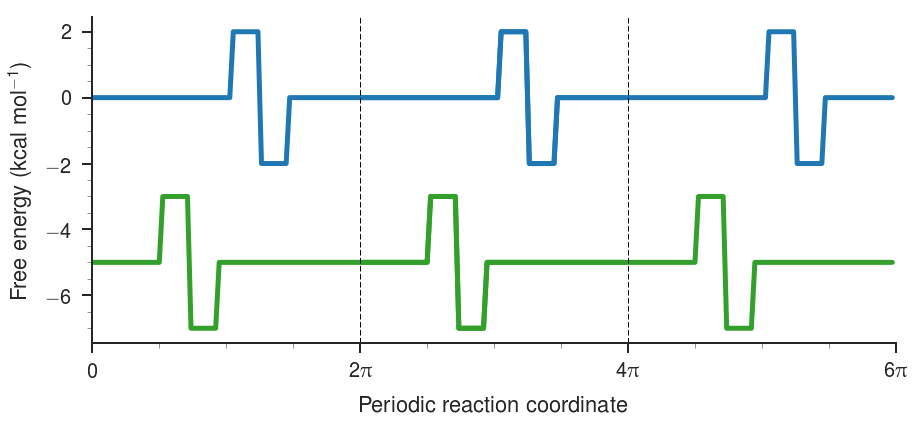

In [73]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2*2, 6))
ax1.plot(this.unbound, alpha=1, c=cmap[1])
ax1.plot(this.bound, alpha=1, c=cmap[3])
ax1.plot(range(int(len(this.unbound)/3), int(2*len(this.unbound)/3)), this.unbound[ int(len(this.unbound)/3) : int(2*len(this.unbound)/3)],
        c=cmap[1])
ax1.plot(range(int(len(this.unbound)/3), int(2*len(this.unbound)/3)), this.bound[ int(len(this.unbound)/3) : int(2*len(this.bound)/3)],
        c=cmap[3])


ax1.set_ylabel('Free energy (kcal mol$^{-1}$)')
ax1.set_xlabel('Periodic reaction coordinate')
ax1.set_xticks([0, len(this.unbound)/3, 2*len(this.unbound)/3 , 3*len(this.unbound)/3])
ax1.set_xticklabels(['$0$', '$2\pi$', '$4\pi$', '$6\pi$'])

ax1.axvline(0, c='k', ls='--', lw=1)
ax1.axvline(len(this.unbound)/3, c='k', ls='--', lw=1)
ax1.axvline(2 * len(this.unbound)/3, c='k', ls='--', lw=1)
ax1.axvline(3 * len(this.unbound)/3, c='k', ls='--', lw=1)
ax1.set_xlim([0, len(this.unbound)])

paper_plot(fig)

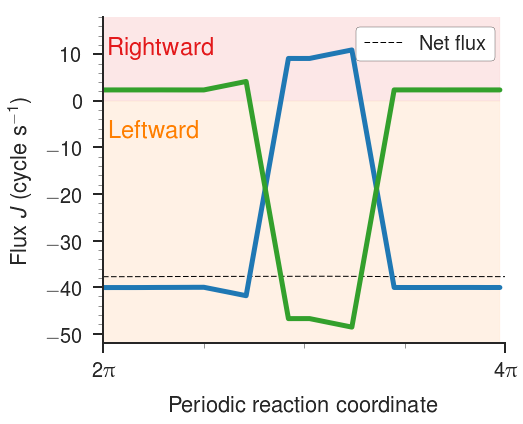

In [74]:
fig, ax1 = plt.subplots(1, 1, figsize=(6*1.2, 6))
# ax1.plot(this.flux_u, alpha=1, c=cmap[1])
# ax1.plot(this.flux_b, alpha=1, c=cmap[3])
ax1.plot(this.flux_u + this.flux_b, c='k', lw=1, ls='--', label='Net flux')
ax1.plot(range(int(len(this.unbound)/3), int(2*len(this.unbound)/3)), this.flux_u[ int(len(this.unbound)/3) : int(2*len(this.unbound)/3)],
        c=cmap[1])
ax1.plot(range(int(len(this.unbound)/3), int(2*len(this.unbound)/3)), this.flux_b[ int(len(this.unbound)/3) : int(2*len(this.bound)/3)],
        c=cmap[3])


ax1.set_ylabel('Flux $J$ (cycle s$^{-1}$)')
ax1.set_xlabel('Periodic reaction coordinate')
ax1.set_xticks([0, len(this.unbound)/3, 2*len(this.unbound)/3 , 3*len(this.unbound)/3])
ax1.set_xticklabels(['$0$', '$2\pi$', '$4\pi$', '$6\pi$'])

ax1.set_xlim([len(this.unbound)/3, 2*len(this.unbound)/3])
ax1.legend(loc='upper right', frameon=True, framealpha=1.0, edgecolor='k')

ax1.fill_between(range(int(len(this.unbound)/3), int(2*len(this.unbound)/3)), 0, 100, 
                 color=cmap[5], alpha=0.1)
ax1.fill_between(range(int(len(this.unbound)/3), int(2*len(this.unbound)/3)), 0, -100, 
                 color=cmap[7], alpha=0.1)
ax1.annotate('Rightward', xy=(77, 10), xytext=(77, 10), textcoords='data', color=cmap[5])
ax1.annotate('Leftward', xy=(77, -8), xytext=(77, -8), textcoords='data', color=cmap[7])
# ax1.annotate('Net flux', xy=(152, 0), xytext=(152, 0), textcoords='data', color='k')

ax1.set_ylim([-52, 18])

paper_plot(fig)